# Demographics


## Imports and data

In [1]:
import pandas as pd

# Load the CSV again, skipping the second header row
df = pd.read_csv("../data/results_all_cleaned.csv", skiprows=[1])

# Split dataset into groups
prolific_df = df[df["Q0_ProlificID"].notna()]
infodienst_df = df[df["Q0_ProlificID"].isna()]


## Number of participants

In [2]:
# Count the number of participants in each group
count_all = df["Q35"].count()
count_prolific = prolific_df["Q35"].count()
count_infodienst = infodienst_df["Q35"].count()

# Format the output
participant_counts = (
    f"Total: {count_all} participants\n"
    f"Prolific {count_prolific} participants\n"
    f"Infodienst: {count_infodienst} participants"
)
print(participant_counts)


Total: 255 participants
Prolific 203 participants
Infodienst: 52 participants


## Age

In [3]:
# Ensure age column is numeric
df["Q35"] = pd.to_numeric(df["Q35"], errors="coerce")

# Define a function to calculate median age
def get_median_age(subset):
    return subset["Q35"].median()

# Split dataset into groups
prolific_df = df[df["Q0_ProlificID"].notna()]
infodienst_df = df[df["Q0_ProlificID"].isna()]

# Compute medians
median_age_prolific = get_median_age(prolific_df)
median_age_infodienst = get_median_age(infodienst_df)
median_age_all = get_median_age(df)

# Output results
comparison_result = (
    f"Median age: {median_age_all:.0f} years\n"
    f"Median age (Prolific): {median_age_prolific:.0f} years\n"
    f"Median age (Infodienst): {median_age_infodienst:.0f} years"
)
print(comparison_result)


Median age: 32 years
Median age (Prolific): 34 years
Median age (Infodienst): 26 years


## Gender

Q36_clean
male                    50.980392
female                  47.058824
prefer not to answer     1.176471
non-binary               0.784314
Name: count, dtype: float64


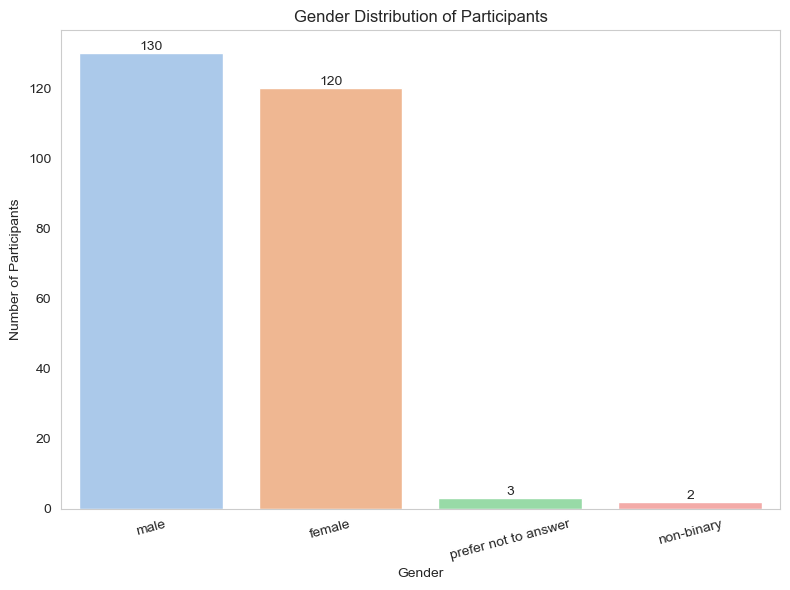

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean and standardize the gender column
df["Q36_clean"] = df["Q36"].str.strip().str.lower()

# Count gender distribution
gender_counts = df["Q36_clean"].value_counts()

total_participants = gender_counts.sum()
gender_percentages = (gender_counts / total_participants) * 100

print(gender_percentages)

# Corrected version without the unsupported 'legend' argument
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x="Q36_clean", hue="Q36_clean", palette="pastel")

for container in ax.containers:
    ax.bar_label(container, padding=0)

plt.title("Gender Distribution of Participants")
plt.xlabel("Gender")
plt.ylabel("Number of Participants")
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


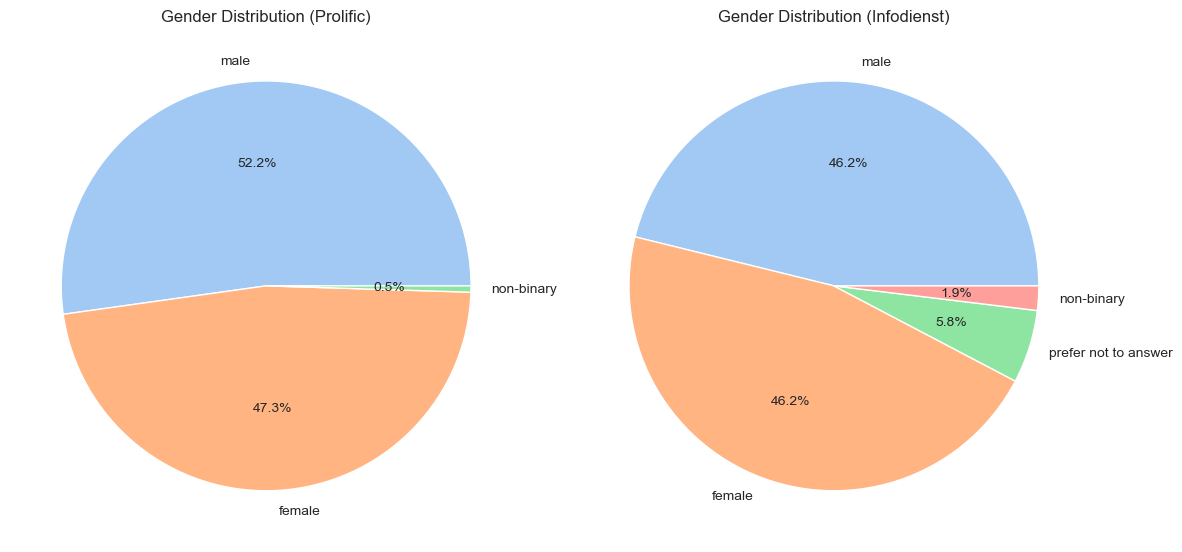

In [6]:
# Prepare gender counts per source
prolific_gender_counts = prolific_df["Q36"].str.strip().str.lower().value_counts()
infodienst_gender_counts = infodienst_df["Q36"].str.strip().str.lower().value_counts()

# Plot side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Prolific pie chart
axes[0].pie(prolific_gender_counts, labels=prolific_gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
axes[0].set_title("Gender Distribution (Prolific)")

# Infodienst pie chart
axes[1].pie(infodienst_gender_counts, labels=infodienst_gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
axes[1].set_title("Gender Distribution (Infodienst)")

plt.tight_layout()
plt.show()


## Country of residence

In [7]:
q37_col = None
for col in df.columns:
    if col.strip().lower() == "q37":
        q37_col = col
        break

# Compute value counts and percentages
if q37_col:
    country_counts = df[q37_col].value_counts(dropna=True)
    country_percent = (country_counts / country_counts.sum()) * 100
    country_stats = pd.DataFrame({
        "Count": country_counts,
        "Percentage": country_percent.round(2)
    })
else:
    country_stats = pd.DataFrame()

country_stats

,Count,Percentage
Q37,,
Germany,57,22.35
UK,47,18.43
USA,34,13.33
Portugal,24,9.41
Poland,20,7.84
Spain,18,7.06
Italy,17,6.67
Greece,14,5.49
Netherlands,6,2.35


## Cybersecurity advice

In [8]:
# Clean the Q39_1 responses to extract numeric values
df["Q39_1_clean"] = df["Q39_1"].str.extract(r"(\d)").astype(float)

# Summarize responses
summary = {
    "counts": df["Q39_1_clean"].value_counts().sort_index(),
    "percentages": df["Q39_1_clean"].value_counts(normalize=True).sort_index() * 100,
    "mean": df["Q39_1_clean"].mean(),
    "std": df["Q39_1_clean"].std()
}

summary

{'counts': Q39_1_clean
 1.0    47
 2.0    70
 3.0    75
 4.0    49
 5.0    14
 Name: count, dtype: int64,
 'percentages': Q39_1_clean
 1.0    18.431373
 2.0    27.450980
 3.0    29.411765
 4.0    19.215686
 5.0     5.490196
 Name: proportion, dtype: float64,
 'mean': np.float64(2.6588235294117646),
 'std': 1.1455453727456588}